In [7]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
print('Done with module import')

Done with module import


In [8]:
Categories=['No_DR','DR']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir=r'C:\Users\karth\Sunayana\Machine Learning\Diabetic Retinopathy\data\KNN' 
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        flat_data_arr.append(img_array.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

loading... category : No_DR
loaded category:No_DR successfully
loading... category : DR
loaded category:DR successfully


In [9]:
print('Model train and fit start')
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)
print('Data split for training and testing ')
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
model = GaussianNB()
# fit the model
model.fit(x_train, y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Model train and fit start
Data split for training and testing 
The Model is trained well with the given images


The predicted Data is :
[0 0 0 ... 0 0 0]
The actual data is:
[0 0 1 ... 1 0 0]
The model is 60.60344827586207% accurate


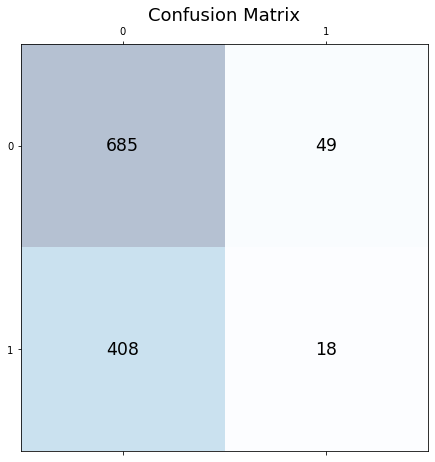

In [22]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics

cm = metrics.confusion_matrix(y_test, y_pred)
cm
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 

plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [30]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

 
#Plotting Precision-Recall Curve
# disp = plot_precision_recall_curve(model, x_test, y_test)

# y_pred=np.argmax(y_pred, axis=1)
# y_test=np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report,confusion_matrix
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.63      0.93      0.75       734
           1       0.27      0.04      0.07       426

    accuracy                           0.61      1160
   macro avg       0.45      0.49      0.41      1160
weighted avg       0.50      0.61      0.50      1160



In [22]:
def predict_class(path):
    print(path)
    img=imread(path)
    plt.imshow(img)
    plt.show()
    # img_resize=resize(img,(50,50,3))
    l=[img.flatten()]
    probability=model.predict_proba(l)
    for ind,val in enumerate(Categories):
        print(f'{val} = {probability[0][ind]*100}%')
    print("The predicted image is : "+Categories[model.predict(l)[0]])

C:\Users\karth\Sunayana\Machine Learning\Diabetic Retinopathy\data\colored_images\colored_images\Severe\21825_left.png


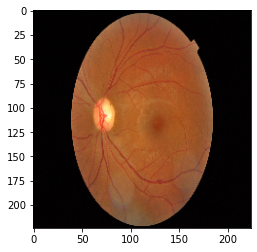

No_DR = 0.0%
DR = 100.0%
The predicted image is : DR


In [23]:
predict_class(r"C:\Users\karth\Sunayana\Machine Learning\Diabetic Retinopathy\data\colored_images\colored_images\Severe\21825_left.png")

C:\Users\karth\Sunayana\Machine Learning\Diabetic Retinopathy\data\colored_images\colored_images\Proliferate_DR\1941_left.png


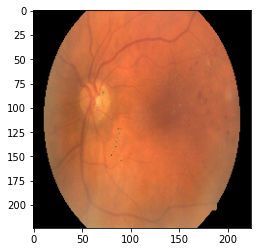

No_DR = 100.0%
DR = 0.0%
The predicted image is : No_DR


In [24]:
predict_class(r"C:\Users\karth\Sunayana\Machine Learning\Diabetic Retinopathy\data\colored_images\colored_images\Proliferate_DR\1941_left.png")

C:\Users\karth\Sunayana\Machine Learning\Diabetic Retinopathy\data\colored_images\colored_images\No_DR\10009_left.png


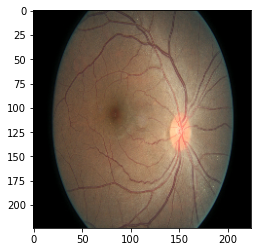

No_DR = 0.0%
DR = 100.0%
The predicted image is : DR


In [26]:
predict_class(r"C:\Users\karth\Sunayana\Machine Learning\Diabetic Retinopathy\data\colored_images\colored_images\No_DR\10009_left.png")

C:\Users\karth\Sunayana\Machine Learning\Diabetic Retinopathy\data\colored_images\colored_images\Moderate\3295_left.png


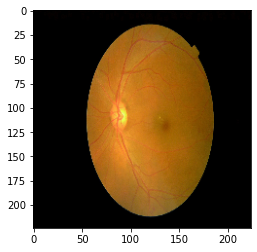

No_DR = 0.0%
DR = 100.0%
The predicted image is : DR


In [30]:
predict_class(r"C:\Users\karth\Sunayana\Machine Learning\Diabetic Retinopathy\data\colored_images\colored_images\Moderate\3295_left.png")

C:\Users\karth\Sunayana\Machine Learning\Diabetic Retinopathy\data\colored_images\colored_images\Mild\7131_left.png


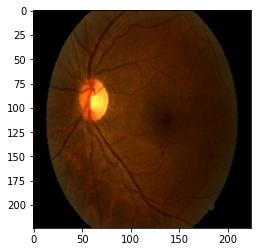

No_DR = 0.0%
DR = 100.0%
The predicted image is : DR


In [31]:
predict_class(r"C:\Users\karth\Sunayana\Machine Learning\Diabetic Retinopathy\data\colored_images\colored_images\Mild\7131_left.png")